In [1]:
from IPython.core.display import HTML

HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
    max-width: 100% !important;
    margin-top: 2em;
}
.output_area .prompt{
    display: none;
}
</style>
""")
#;

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Import data

In [3]:
dataset = pd.read_csv("data/csv/B150101134132.csv", header=0, parse_dates=False)
dataset

,Timestamp,Press.Left,Press.Center,Press.Right,Magnet.X,Magnet.Y,Magnet.Z,Accel.X,Accel.Y,Accel.Z,Gyro.X,Gyro.Y,Gyro.Z
0,25000,1000.071167,1000.047729,999.920532,-17.500,19.7500,-34.750,7.84,-3.89,4.04,-0.005556,0.036667,0.043333
1,25010,1000.051147,1000.027710,999.900513,-17.500,19.7500,-34.750,7.84,-3.87,4.02,-0.012222,0.008056,0.030000
2,25020,1000.031128,1000.087769,999.930542,-17.500,19.7500,-34.750,7.82,-3.89,4.03,-0.008889,0.020000,0.016667
3,25030,1000.041138,1000.007690,999.890503,-17.500,19.7500,-34.750,7.83,-3.84,4.03,-0.006667,0.013333,0.014444
4,25040,1000.041138,1000.017700,999.970459,-17.875,17.8750,-34.375,7.87,-3.87,4.05,-0.008889,0.015556,0.008889
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29404,319142,1193.171143,1193.507690,1192.050537,-4.375,17.5625,26.875,2.15,-8.07,-5.04,0.270000,0.444444,0.167778
29405,319152,1193.151123,1193.407715,1192.020508,-6.875,18.3750,25.375,2.15,-8.10,-5.01,0.267778,0.373333,0.166667
29406,319162,1193.121094,1193.477783,1192.060547,-6.875,18.3750,25.375,2.15,-8.13,-5.01,0.264444,0.320000,0.173333
29407,319172,1193.051147,1193.427734,1192.040527,-6.875,18.3750,25.375,2.14,-8.11,-4.98,0.262222,0.177778,0.171111


Offset timestamps and convert timestamps to seconds

In [4]:
dataset["Timestamp"] -= min(dataset["Timestamp"])
dataset["Timestamp.Sec"] = dataset["Timestamp"] / 1000
dataset

,Timestamp,Press.Left,Press.Center,Press.Right,Magnet.X,Magnet.Y,Magnet.Z,Accel.X,Accel.Y,Accel.Z,Gyro.X,Gyro.Y,Gyro.Z,Timestamp.Sec
0,0,1000.071167,1000.047729,999.920532,-17.500,19.7500,-34.750,7.84,-3.89,4.04,-0.005556,0.036667,0.043333,0.000
1,10,1000.051147,1000.027710,999.900513,-17.500,19.7500,-34.750,7.84,-3.87,4.02,-0.012222,0.008056,0.030000,0.010
2,20,1000.031128,1000.087769,999.930542,-17.500,19.7500,-34.750,7.82,-3.89,4.03,-0.008889,0.020000,0.016667,0.020
3,30,1000.041138,1000.007690,999.890503,-17.500,19.7500,-34.750,7.83,-3.84,4.03,-0.006667,0.013333,0.014444,0.030
4,40,1000.041138,1000.017700,999.970459,-17.875,17.8750,-34.375,7.87,-3.87,4.05,-0.008889,0.015556,0.008889,0.040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29404,294142,1193.171143,1193.507690,1192.050537,-4.375,17.5625,26.875,2.15,-8.07,-5.04,0.270000,0.444444,0.167778,294.142
29405,294152,1193.151123,1193.407715,1192.020508,-6.875,18.3750,25.375,2.15,-8.10,-5.01,0.267778,0.373333,0.166667,294.152
29406,294162,1193.121094,1193.477783,1192.060547,-6.875,18.3750,25.375,2.15,-8.13,-5.01,0.264444,0.320000,0.173333,294.162
29407,294172,1193.051147,1193.427734,1192.040527,-6.875,18.3750,25.375,2.14,-8.11,-4.98,0.262222,0.177778,0.171111,294.172


Calculate ensemble averages

In [5]:
mean_pressure = dataset[["Press.Left", "Press.Center", "Press.Right"]].mean(axis=1)
mean_magnitude = dataset[["Magnet.X", "Magnet.Y", "Magnet.Z"]].mean(axis=1)
mean_acceleration = dataset[["Accel.X", "Accel.Y", "Accel.Z"]].mean(axis=1)
mean_gyroscope = dataset[["Gyro.X", "Gyro.Y", "Gyro.Z"]].mean(axis=1)

## Plotting data

In [6]:
figures = []

plotting pressure measurements

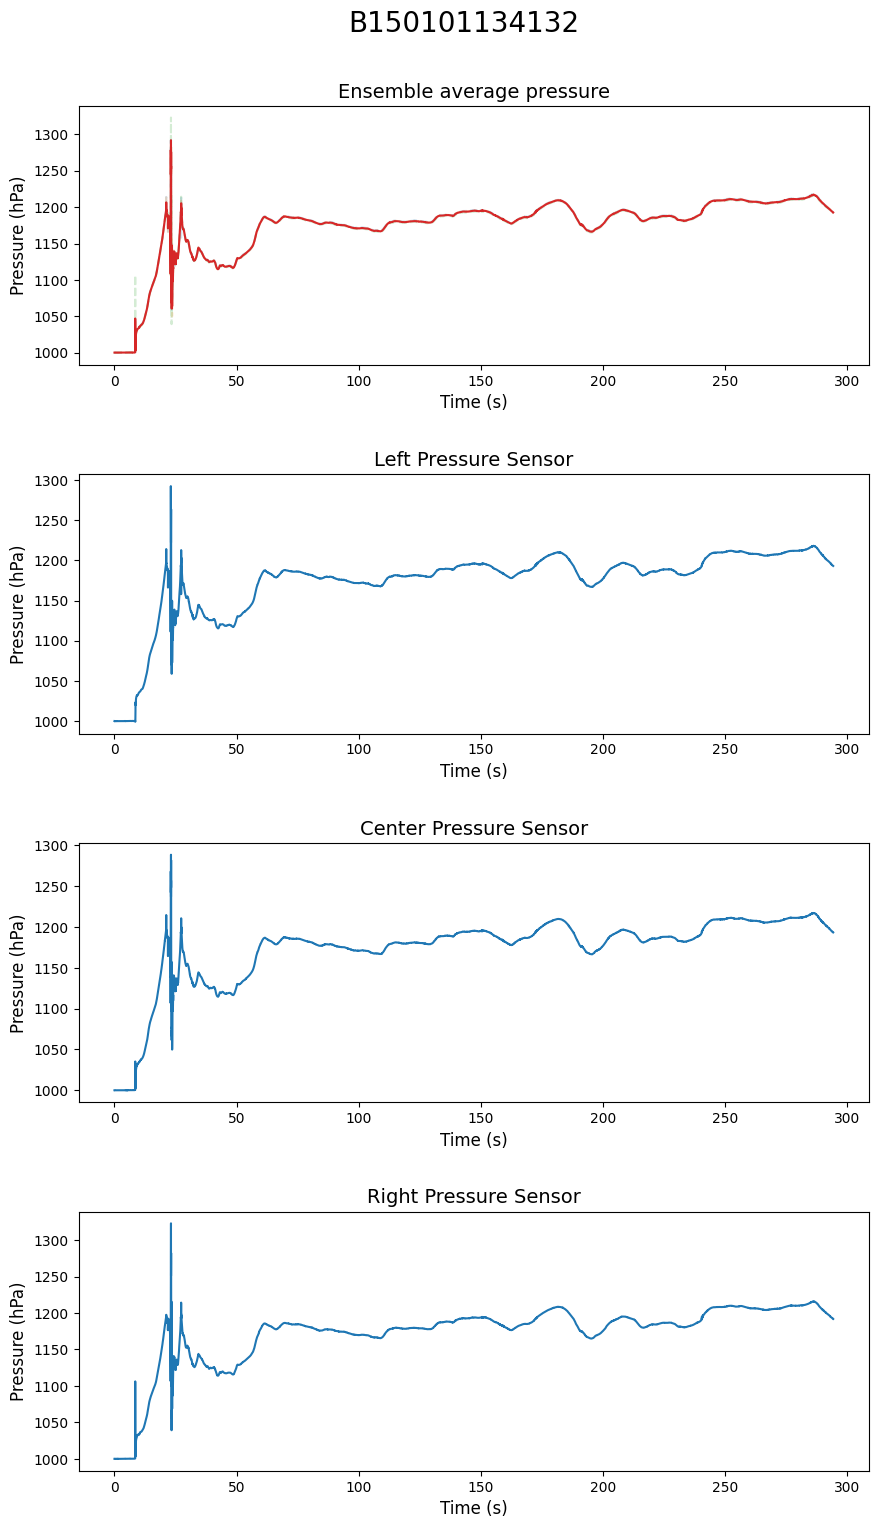

In [7]:
n_figures = 4
figure, axis = plt.subplots(n_figures, 1, figsize=(10, 4 * n_figures))
figure.tight_layout(h_pad=6, pad=6)
figure.suptitle("B150101134132", fontsize=20)
figure.subplots_adjust(top=0.92)

pr_columns = ["Press.Left", "Press.Center", "Press.Right"]
pr_names = ["Left Pressure Sensor", "Center Pressure Sensor", "Right Pressure Sensor"]

ax = axis[0]
ax.plot(dataset["Timestamp.Sec"], dataset["Press.Left"], '--', alpha=0.2)
ax.plot(dataset["Timestamp.Sec"], dataset["Press.Center"], '--', alpha=0.2)
ax.plot(dataset["Timestamp.Sec"], dataset["Press.Right"], '--', alpha=0.2)
ax.plot(dataset["Timestamp.Sec"], mean_pressure)
ax.set_xlabel("Time (s)", fontsize=12)
ax.set_ylabel("Pressure (hPa)", fontsize=12)
ax.set_title("Ensemble average pressure", fontsize=14)

for pr_i in range(len(pr_columns)):
    ax = axis[pr_i + 1]
    ax.plot(dataset["Timestamp.Sec"], dataset[pr_columns[pr_i]])

    ax.set_xlabel("Time (s)", fontsize=12)
    ax.set_ylabel("Pressure (hPa)", fontsize=12)
    ax.set_title(pr_names[pr_i], fontsize=14)    

figures.append(figure)

plotting magnitude measurements

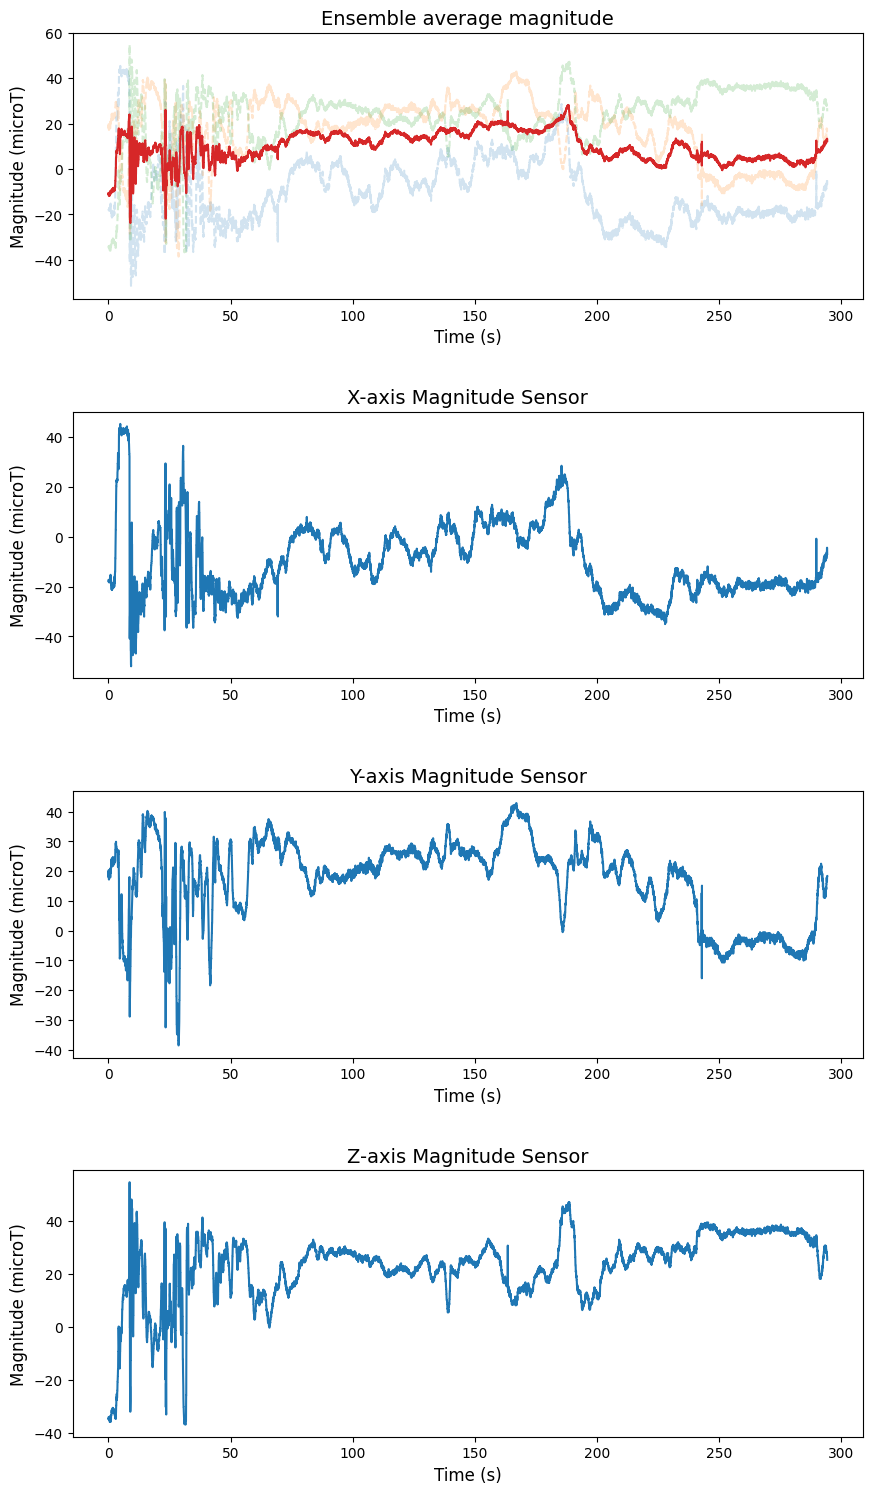

In [8]:
n_figures = 4
figure, axis = plt.subplots(n_figures, 1, figsize=(10, 4 * n_figures))
figure.tight_layout(h_pad=6, pad=6)

mag_columns = ["Magnet.X", "Magnet.Y", "Magnet.Z"]
mag_names = ["X-axis Magnitude Sensor", "Y-axis Magnitude Sensor", "Z-axis Magnitude Sensor"]

ax = axis[0]
ax.plot(dataset["Timestamp.Sec"], dataset["Magnet.X"], '--', alpha=0.2)
ax.plot(dataset["Timestamp.Sec"], dataset["Magnet.Y"], '--', alpha=0.2)
ax.plot(dataset["Timestamp.Sec"], dataset["Magnet.Z"], '--', alpha=0.2)
ax.plot(dataset["Timestamp.Sec"], mean_magnitude)
ax.set_xlabel("Time (s)", fontsize=12)
ax.set_ylabel("Magnitude (microT)", fontsize=12)
ax.set_title("Ensemble average magnitude", fontsize=14)

for mag_i in range(len(mag_columns)):
    ax = axis[mag_i + 1]
    ax.plot(dataset["Timestamp.Sec"], dataset[mag_columns[mag_i]])

    ax.set_xlabel("Time (s)", fontsize=12)
    ax.set_ylabel("Magnitude (microT)", fontsize=12)
    ax.set_title(mag_names[mag_i], fontsize=14)    

figures.append(figure)

plotting acceleration measurements

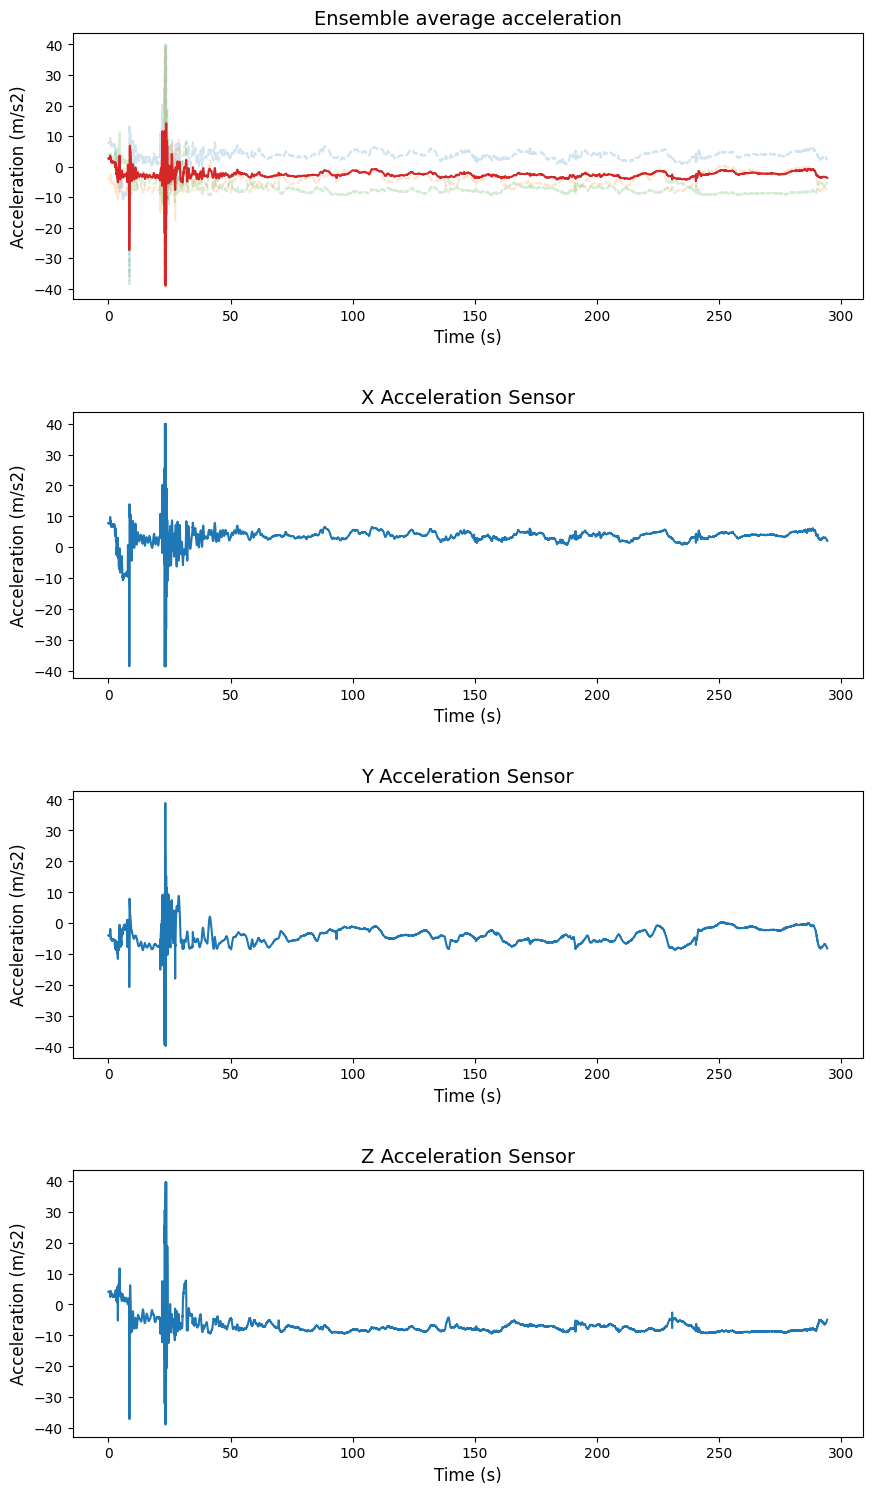

In [9]:
n_figures = 4
figure, axis = plt.subplots(n_figures, 1, figsize=(10, 4 * n_figures))
figure.tight_layout(h_pad=6, pad=6)

acc_columns = ["Accel.X", "Accel.Y", "Accel.Z"]
acc_names = ["X Acceleration Sensor", "Y Acceleration Sensor", "Z Acceleration Sensor"]

ax = axis[0]
ax.plot(dataset["Timestamp.Sec"], dataset["Accel.X"], '--', alpha=0.2)
ax.plot(dataset["Timestamp.Sec"], dataset["Accel.Y"], '--', alpha=0.2)
ax.plot(dataset["Timestamp.Sec"], dataset["Accel.Z"], '--', alpha=0.2)
ax.plot(dataset["Timestamp.Sec"], mean_acceleration)
ax.set_xlabel("Time (s)", fontsize=12)
ax.set_ylabel("Acceleration (m/s2)", fontsize=12)
ax.set_title("Ensemble average acceleration", fontsize=14)

for acc_i in range(len(acc_columns)):
    ax = axis[acc_i + 1]
    ax.plot(dataset["Timestamp.Sec"], dataset[acc_columns[acc_i]])

    ax.set_xlabel("Time (s)", fontsize=12)
    ax.set_ylabel("Acceleration (m/s2)", fontsize=12)
    ax.set_title(acc_names[acc_i], fontsize=14)

figures.append(figure)

plotting gyroscope measurements

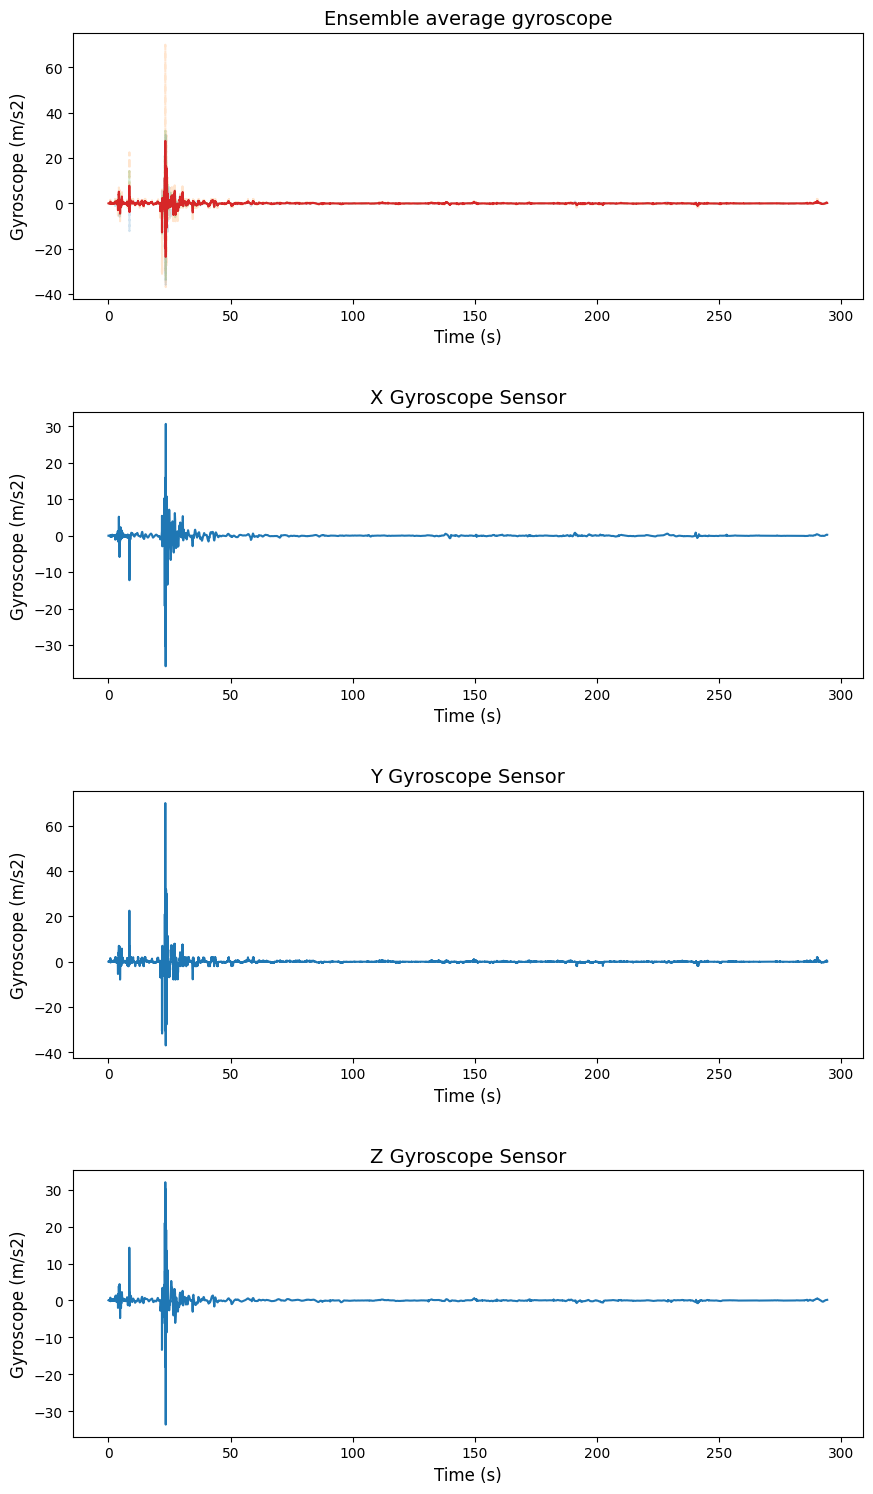

In [10]:
n_figures = 4
figure, axis = plt.subplots(n_figures, 1, figsize=(10, 4 * n_figures))
figure.tight_layout(h_pad=6, pad=6)

gyro_columns = ["Gyro.X", "Gyro.Y", "Gyro.Z"]
gyro_names = ["X Gyroscope Sensor", "Y Gyroscope Sensor", "Z Gyroscope Sensor"]

ax = axis[0]
ax.plot(dataset["Timestamp.Sec"], dataset["Gyro.X"], '--', alpha=0.2)
ax.plot(dataset["Timestamp.Sec"], dataset["Gyro.Y"], '--', alpha=0.2)
ax.plot(dataset["Timestamp.Sec"], dataset["Gyro.Z"], '--', alpha=0.2)
ax.plot(dataset["Timestamp.Sec"], mean_gyroscope)
ax.set_xlabel("Time (s)", fontsize=12)
ax.set_ylabel("Gyroscope (m/s2)", fontsize=12)
ax.set_title("Ensemble average gyroscope", fontsize=14)

for gyro_i in range(len(gyro_columns)):
    ax = axis[gyro_i + 1]
    ax.plot(dataset["Timestamp.Sec"], dataset[gyro_columns[gyro_i]])

    ax.set_xlabel("Time (s)", fontsize=12)
    ax.set_ylabel("Gyroscope (m/s2)", fontsize=12)
    ax.set_title(gyro_names[gyro_i], fontsize=14)

figures.append(figure)

## Saving to pdf

In [11]:
figures

[<Figure size 1000x1600 with 4 Axes>,
 <Figure size 1000x1600 with 4 Axes>,
 <Figure size 1000x1600 with 4 Axes>,
 <Figure size 1000x1600 with 4 Axes>]

In [12]:
from matplotlib.backends.backend_pdf import PdfPages

pp = PdfPages('aa.pdf')
for fig in figures:
    fig.savefig(pp, format = 'pdf')
pp.close()